<h1> Assignment - 4 </h1>

<h2> Adult Data Set </h2>

<h3> Introduction </h3>

The Adult Data Set contains the record of the workers. The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data. The target variable of this dataset is Income. On given attributes, the aim is to predict the annual income of a individual whether it is less than, greater than or equal to 50K. 

- There are a total of 48,842 rows and 15 attributes including target attribute(income).
- The dataset contains missing values that are marked with a question mark character (?).
- The given dataset has both categorical and numeric variables.
-There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. 
 - '>50K' : majority class, approximately 25%.
 - '<=50K': minority class, approximately 75%.


<h3> What I got to know about the features in dataset </h3>

- age of the worker (continuous and numerical)<br>
- workclass tells the class of work (categorial and non-numerical) :- Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked<br>
- fnlwgt tells the final weight of how much of the population it represents (continuous and numerical)<br>
- education (categorial and non-numerical) :- Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool<br>
- educational-num tells the numeric education level (continuous and numerical)<br>
- marital-status (categorical and non-numeric) :- Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse <br>
- occupation (categorical and non-numeric) :- Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces <br>
- relationship (categorical and non-numeric) :- Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried <br>
- race (categorical and non-numerical) :- White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black <br>
- sex (categorical and non-numerical) :- Female, Male <br>
- capital-gain (continuous and numerical) <br>
- capital-loss (continuous and numerical) <br>
- hours-per-week shows the average number of hour working per week of an individual (continuous and numerical) <br>
- native-country (categorical and non-numeric) :- United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands <br>
- Income shows the annual income of workers (discrete) :- >50K, <=50K

<h3> Objective </h3>

To perform the exploratory data analysis on Adult dataset and to predict the annual income of the workers based on their given 14 attributes. Annual income is our class which is to be predicted for new data point and can have two different values : >50K or <=50K.

<h5> Given : </h5>

- age
- workclass
- fnlwgt
- education
- educational-num
- marital-status
- occupation
- relationship
- race
- sex
- capital-gain
- capital-loss
- hours-per-week
- native-country

<h5> To predict </h5>

- Income

### Load the data

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
# Reading csv file to the pandas dataframe

missing_values = ['?']
df = pd.read_csv('adult.csv',na_values = missing_values)

* We have replaced the missing values from the dataset which are present in the form of  '?'  to NaN.

<h2> Statistical Data Analysis </h2>

In [225]:
#number of data points
print(df.shape)

(48842, 15)


<h5> Observation </h5>

- No. of rows : 48842
- No. of cols : 15

In [226]:
# Showing the first 5 rows  of the dataset

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<h5> Observation </h5>

- There are 6 numerical columns and 9 non-numerical columns.
- age, fnlwgt, educational-num, capital-gain, capital-loss and hours-per-week are numerical columns.
- workclass, education, marital-status, occupation, relationship, race, gender, native-country and income are non-numerical columns.
- There are some missing values in workclass, occupation and native-country column.
- There are only two types of column values : int64 or object.
- The info() function also shows the number of not null values in the column. 

In [228]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<h5> Observation </h5>

- Range can be calculated for each numerical column using : [min-max]. For eg : age is in the range of [17-90]. 
- No. of unique values can be found for non-numerical columns. For eg : workclass has 8 unique values.
- Can find the most repeated item in non-numerical columns (top) and also find its frequency (freq). For eg : 32650 workers are male in respect of gender.
- Detect the outliers if there is any drastic difference between mean and median (50%). For ex : The mean of capital-gain is 1079.06 and the median is 0.00. Hence, there must be some outliers.
- Can find the spread : 75% - 25%. For eg : spread of age is 20.00

<h2>Treating Missing Values</h2>

In [229]:
# Identifying the missing values in the columns.

df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Observation

- There are missing values in workclass, occupation and native-country.

### Missing Value Pattern 

- There are 7% missing values.<br>
- There are missing values in three columns : workclass, occupation and native-country.<br>
- There is no relationship between the missingness of the native-region and any other features. Those missing data points of native-region are a random subset of the data. Therefore, the missing values of native-region are <b>Missing Completely at Random (MCAR)</b>.<br>
- When the workclass of a worker is missing, his occupation is also missing but vice-versa is not true. Therefore, we can conclude that missingness of workclass is dependent on missingness of occupation. Therefore, the missing values of workclass and occupation are following the <b>Missing at Random (MAR)</b> pattern.<br>

### Removing the missing values

In [230]:
# Removing all the missing values by removing the rows where missing values occur

new_df=df.dropna()

# we have removed all the rows which have missing values

new_df.info()
print("\n")
print('*'*150)
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


**************************************************************************

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [231]:
new_df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222.000000,45222,4.522200e+04,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,NaN,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,34014
mean,38.547941,NaN,1.897347e+05,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,1.056392e+05,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173882e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783160e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379260e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


#### Observation

- After removing all the missing values, there are 45222 rows left.
- <b>Percentage of rows that were removed </b>= (48842 - 45222 / 48842)*100 = 7.41%

### Removing the unneccesary column 'fnlwgt'

In [232]:
# Removing the ‘fnlwgt’ column  as it has no predictive power

new_df = new_df.drop(columns = "fnlwgt")
new_df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Percentage of data loss

In [233]:
# Percentage of rows that were removed while handling missing values

# perc = ((df.shape[0]-new_df.shape[0])/df.shape[0])*100

fraction = 1-(len(new_df.index)/len(df.index))
perc = fraction*100
print("Percentage of removed rows : {:.2f}%".format(perc))

Percentage of removed rows : 7.41%


##  Univariate analysis 

### i) For numerical features

- For numerical features analysis, we have many plots like box-plots, histographs, KDE, PDF etc.

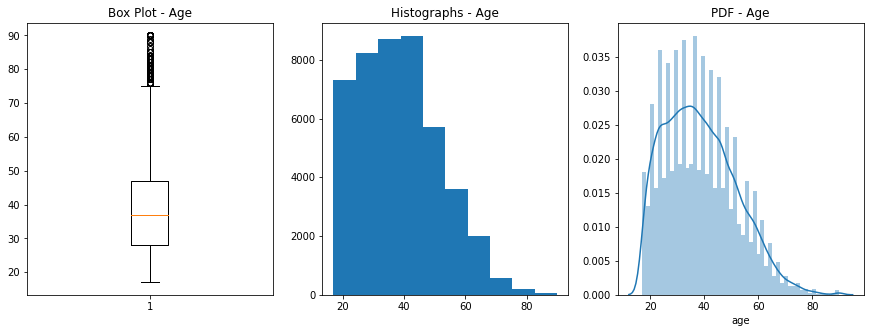

In [234]:
# Age

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Box Plot - Age")
plt.boxplot(new_df['age'])

plt.subplot(1,3,2)
plt.title("Histographs - Age")
plt.hist(new_df['age'])

plt.subplot(1,3,3)
plt.title("PDF - Age")
sns.distplot(new_df['age'],hist=True, rug=False)

#### Observation :

- Minimum age : 17 & Maximum age :90
- Median is around 37 (Using Box Plot).
- IQR spread is (75% - 25%) = (47 -28) = 19 (Using Box Plot).
- Workers having 80 years above age are outliers in the data (Using Box Plot).
- All workers are above 17 years.
- Maximum no. of workers are in the age between 30-40 (Using histographs) or we can say that 30-40 has the highest frequency distribution.
- PDF of Age is positively skewed, this means mean is greater than its median.
- There is a maximum posibility that is worker is around 40 years and least probability of getting a worker above 80 years (Using PDF).

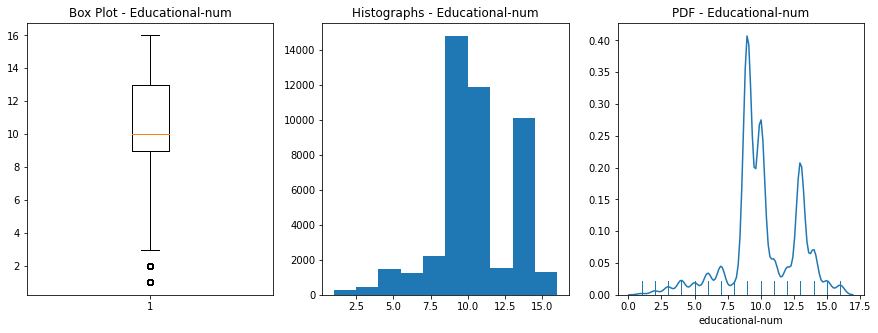

In [235]:
# Educational-num

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Box Plot - Educational-num")
plt.boxplot(new_df['educational-num'])

plt.subplot(1,3,2)
plt.title("Histographs - Educational-num")
plt.hist(new_df['educational-num'])

plt.subplot(1,3,3)
plt.title("PDF - Educational-num")
sns.distplot(new_df['educational-num'],hist=False, rug=True)

#### Observation :

- Minimum educational-num : 1 & Maximum educational-num : 16
- Median is around 10 (Using Box Plot).
- IQR spread is (75% - 25%) = (13 - 9) = 4 (Using Box Plot).
- There are some values in the educational-num which are smaller than 5 are <b> Outliers </b> (Using Box Plot).
- 9-10 has highest frequency distribution, i.e among 48842, 14000 data-points are in the range of 9-10 (Using histograph).
- The maximum probability distribution of educational-num is at 9.

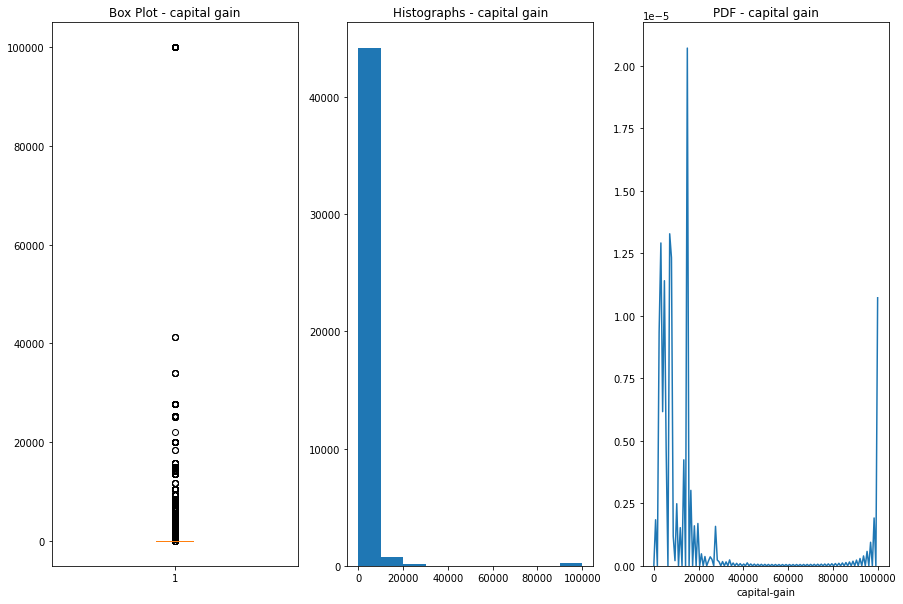

In [236]:
# Capital-gain

plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.title("Box Plot - capital gain")
plt.boxplot(new_df['capital-gain'])

plt.subplot(1,3,2)
plt.title("Histographs - capital gain")
plt.hist(new_df['capital-gain'])

plt.subplot(1,3,3)
plt.title("PDF - capital gain")
sns.distplot(new_df['capital-gain'],hist=False, rug=False)

#### Observation

- Minimum capital-gain : 0.00 & Maximum capital-gain : 9999.00.
- Mean : 1101.43 & Median : 0.00.
- The maximum frequency distribution is between 0-20000.
- Their is maximum probability distribution in the range of 0-20000.
- The capital-gain is distributed partially. Density of datapoints is high around 0 and as the range is increasing, density is decreasing.
- Capital-gain above 0 are acting as outliers. The density of outliers is high in the range of 0-20000.
- There is zero probability of getting capital-gain in between 40000-80000.
- The plot is partially aligned towards the right and dont follow the gaussian distribution. 


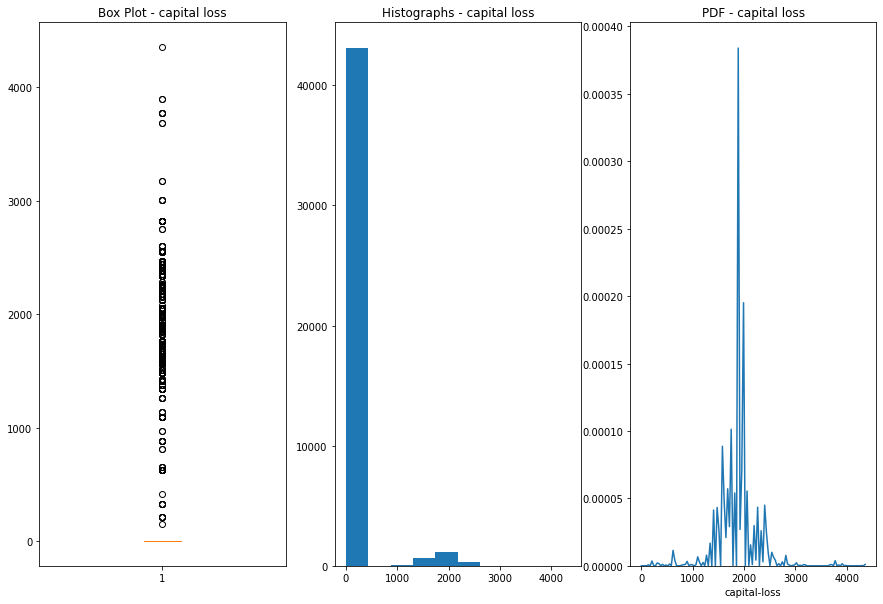

In [237]:
# Capital-loss

plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.title("Box Plot - capital loss")
plt.boxplot(new_df['capital-loss'])

plt.subplot(1,3,2)
plt.title("Histographs - capital loss")
plt.hist(new_df['capital-loss'])

plt.subplot(1,3,3)
plt.title("PDF - capital loss")
sns.distplot(new_df['capital-loss'],hist=False, rug=False)

#### Observation

- Minimum capital-loss : 0.00 & Maximum capital-loss : 4356.00.
- Mean : 88.59 & Median : 0.00.
- The maximum frequency distribution is between 0-1000.
- The capital-loss is distributed partially. Density of datapoints is high around 1000-2000 and as the range is increasing, density is decreasing.
- Capital-gain above 0 are acting as outliers. The density of outliers is high in the range of 1000-2000.
- There is zero probability of getting capital-gain in between 3000-4000.
- The plot doesnt follow the gaussian distribution. 


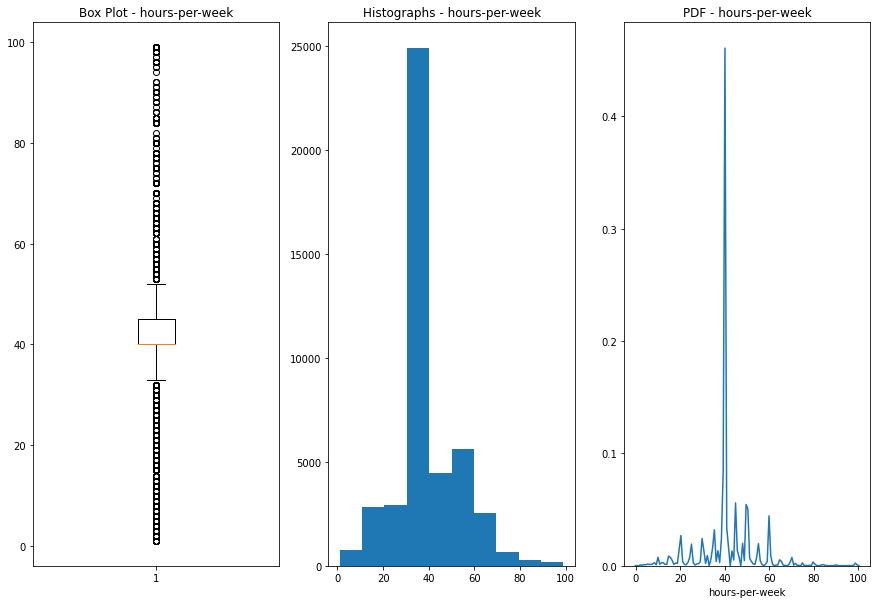

In [238]:
# Hours Per Week

plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.title("Box Plot - hours-per-week")
plt.boxplot(new_df['hours-per-week'])

plt.subplot(1,3,2)
plt.title("Histographs - hours-per-week")
plt.hist(new_df['hours-per-week'])

plt.subplot(1,3,3)
plt.title("PDF - hours-per-week")
sns.distplot(new_df['hours-per-week'],hist=False, rug=False)

#### Observation

- Minimum hours-per-week : 1.00 & Maximum hours-week-hours : 99.00.
- On an average workers work for 40.93 hours per week.
- 50% of the workers work for 40 hours per week.
- There are many workers who works for more than 40 hours per week and same for workers who works for less than 40 hours per week. Hence, they are outliers.
- The maximum frequency distribution is between 20-40, i.e, around 25000 workers among 48852 work for 20-40 hours-per-week.
- The hours-per-week is distributed partially.
- There is less probability of working less than 20 or more than 60 hours per week. But has highest probability to work for 40 hours.
- The plot doesnt follow the gaussian distribution. 

### ii) For categorical features

- For the analysis of categorical features, we have count plots which gives the frequency distribution for each unique value.

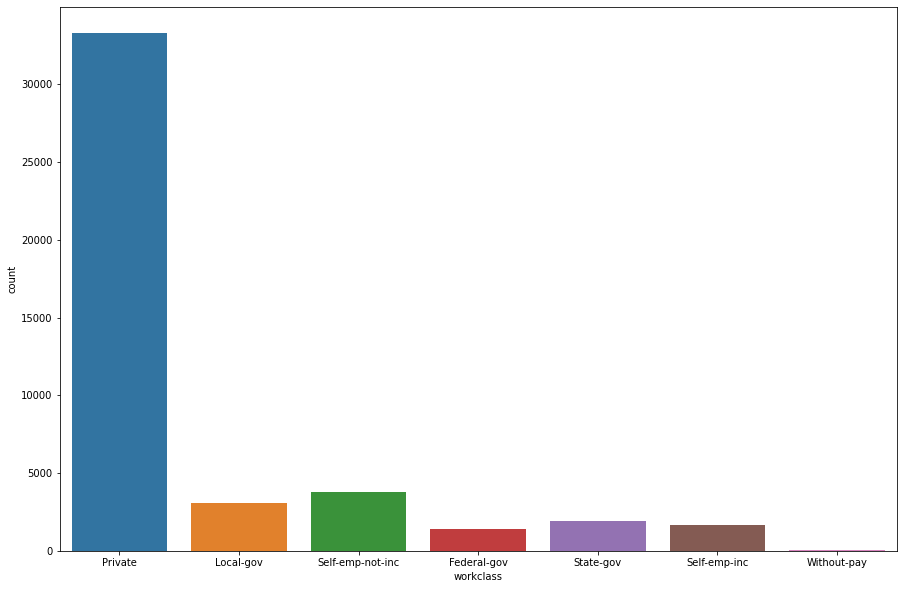

In [239]:
# Workclass

plt.figure(figsize=(15,10))

sns.countplot(data=new_df, x = 'workclass')

#### Observation 

- There are 6 unique workclass.
- Most of the workers (almost 70% ) belongs to private sector.
- No one is working without payment.
- For rest of the workclass, workers are distributed almost equally.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

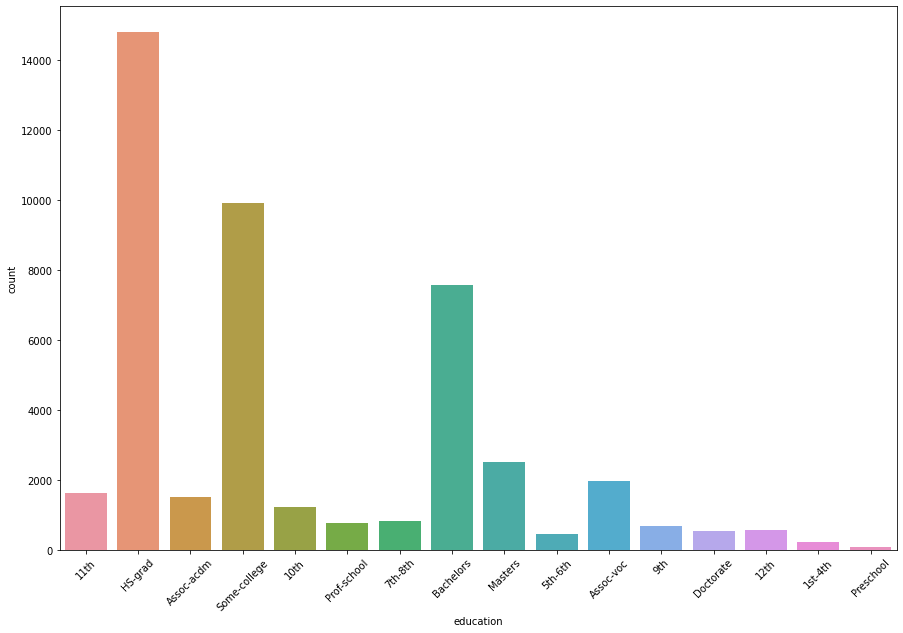

In [240]:
# Education

plt.figure(figsize=(15,10))
sns.countplot(data=new_df, x = 'education')
plt.xticks(rotation=45)

#### Observation

- Maximum no. of workers are high school graduate.
- Around 50% of remaining are in college or completed their bachelors.
- Around 2500 workers has completed their Masters.
- Remaining of them completed their primary or secondary education.
- There is very less count of preschool students.
- Therefore we can say that almost 75% of the workers are well-educated.

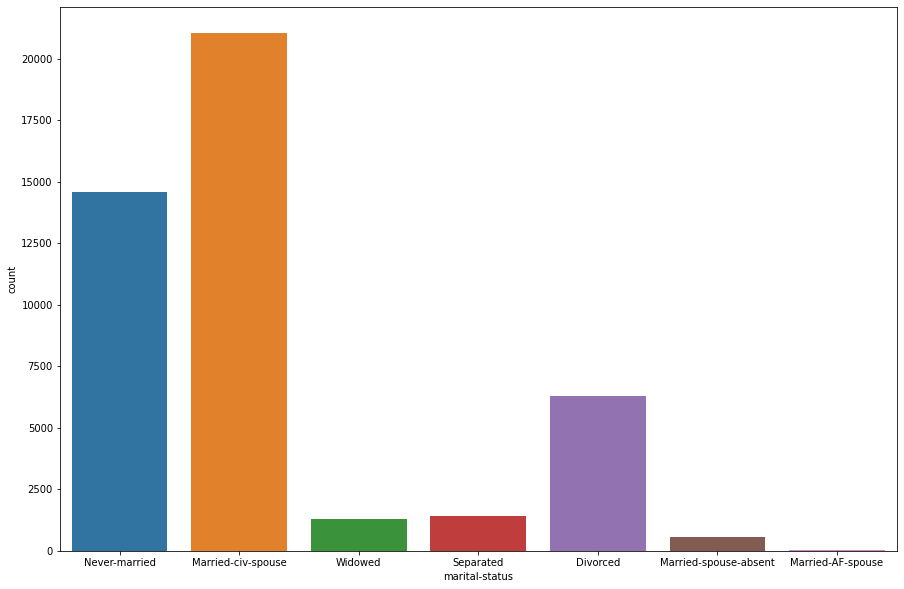

In [241]:
# Marital-status

plt.figure(figsize=(15,10))

sns.countplot(data=new_df, x = 'marital-status')

#### Observation

- All the workers are civilians, no one belongs to armed forces.
- Maximum no. of workers are married and living together. But around 500 workers are living apart.
- There are around 14000 people who never married.
- Around 6000 workers are divorced.
- Remaining of them are either widows or separated.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

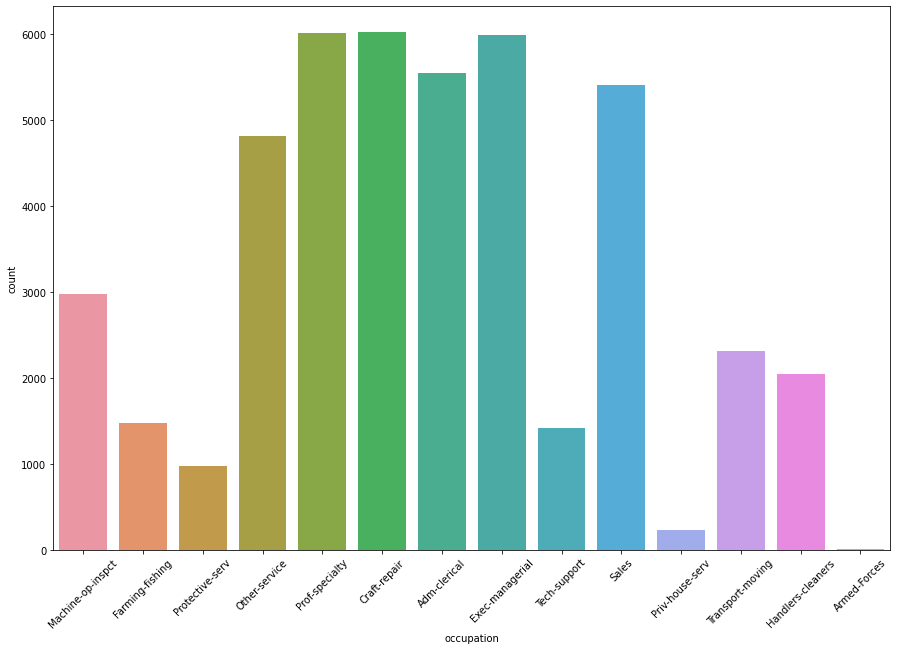

In [242]:
# Occupation

plt.figure(figsize=(15,10))
sns.countplot(data=new_df, x = 'occupation')
plt.xticks(rotation=45)

#### Observation

- There are 14 unique items in occupation.
- Most frequent occupation  : Craft-repair.
- Least frequent occupation : Armed Forces.
- 70% of all occupation belongs to prof-speciality, craft-repair, adm-clerical and execution-managerial.
- Remaining are almost equally distributed.

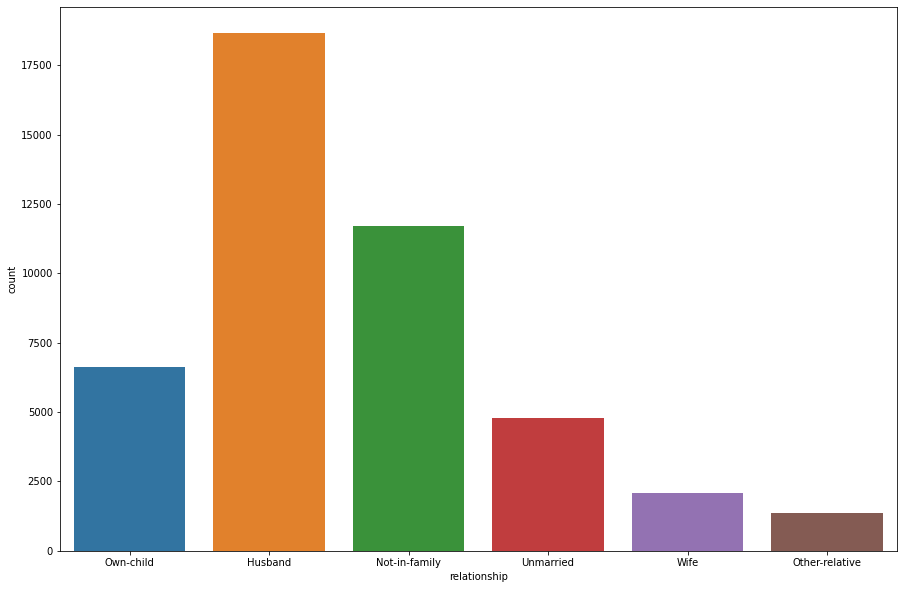

In [243]:
# Relationship

plt.figure(figsize=(15,10))
sns.countplot(data=new_df, x = 'relationship')

#### Observation

- There are 6 unique values in relationship attribute.
- Most of the employees are husbands (married and man).
- The ratio of married man vs married woman varies highly.
- Almost 11000 are not living with their families.
- Reamining are either unmarried or parents. 

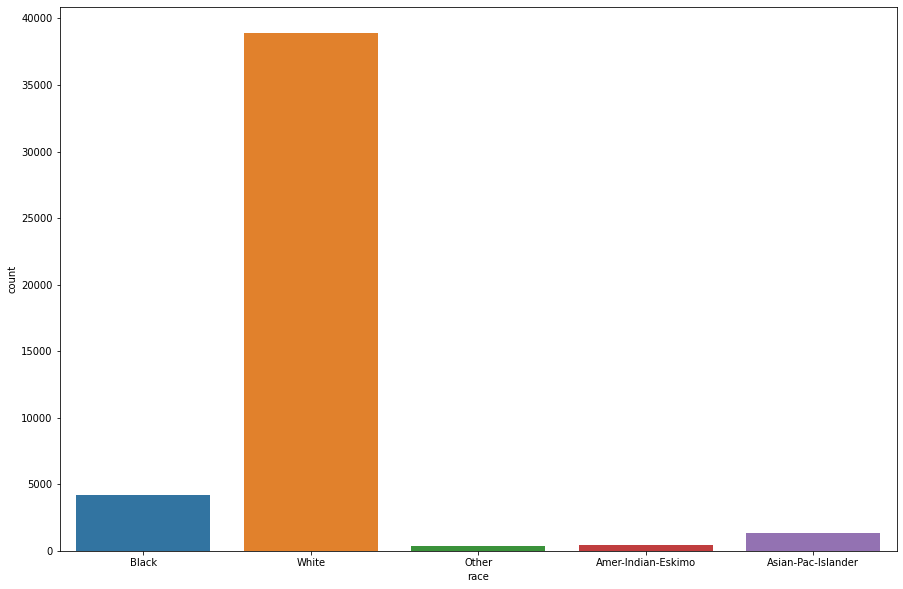

In [244]:
# Race

plt.figure(figsize=(15,10))
sns.countplot(data=new_df, x = 'race')

#### Observation

- This plot is biased, almost 75% of workers are White.
- Around 4000 are Black.
- There is less number of employees who belong to amer-indian-eskimo and asian-pac-islander.

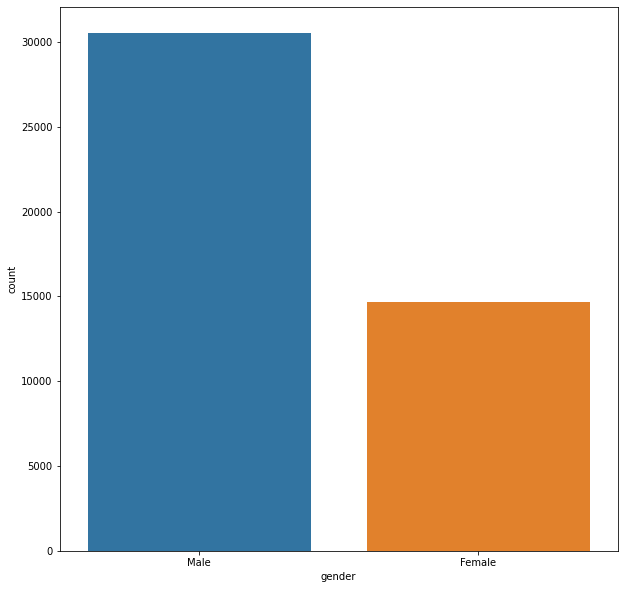

In [245]:
# Gender
plt.figure(figsize=(10,10))
sns.countplot(data=new_df, x = 'gender')

#### Observation

- There are more working male than female (67-33).
- The ratio of male and female is around 2:1.
- The frequency of male is around 30000.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

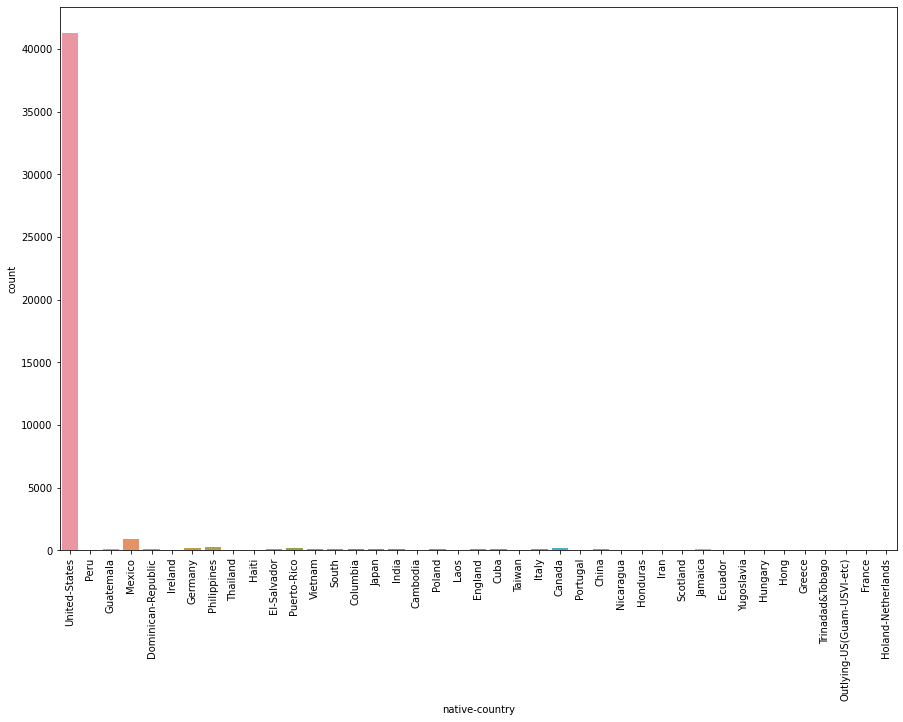

In [246]:
plt.figure(figsize=(15,10))

sns.countplot(data=new_df, x = 'native-country')
plt.xticks(rotation=90)

#### Observation

- This plot is biased to United-States.
- Almost 90% of employees are from United-Stated.
- The second most frequent country is mexico.
- And the remaining percentage of employees are from other countries.

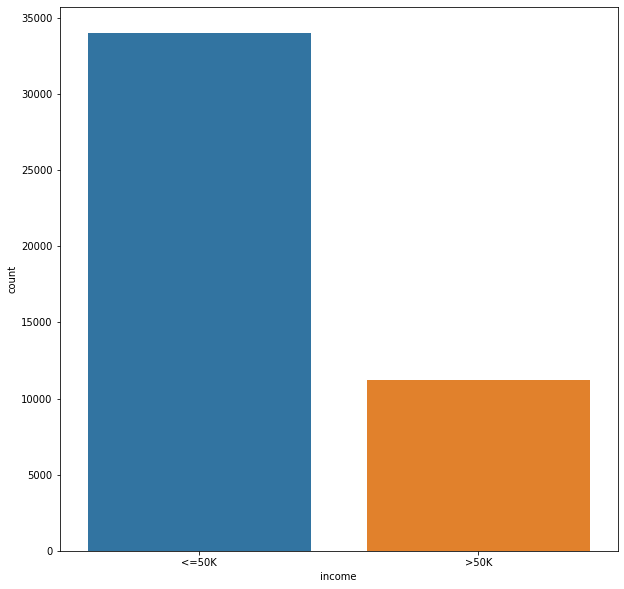

In [247]:
# Income
plt.figure(figsize=(10,10))
sns.countplot(data=new_df, x = 'income')

#### Observation

- Most of the employees have less than or equal to 50K salary.
- Around 10000 of employees have 50K+ salary.

## Bivariate Analysis

- Using Bivariate Analysis, we can find the relation between :
 - Two numerical columns
 - Categorical and numerical column
 - Two categorical columns

### i)  Relationships between numerical columns 

- We can derive relationship between numerical columns using scatter plots, hexbin plots, pair plots, etc.


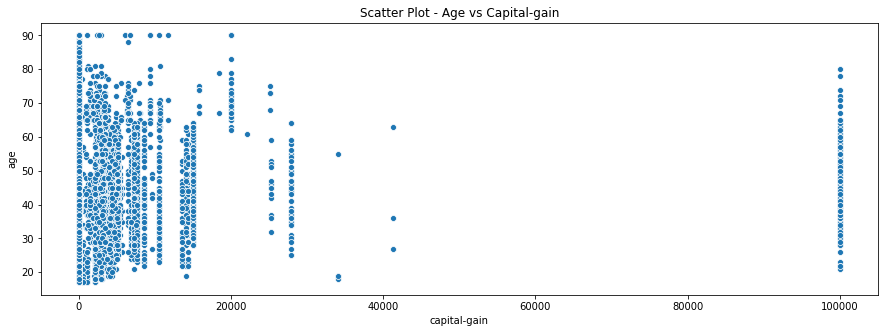

In [248]:
# Scatter Plot - Age vs Capital-gain
plt.figure(figsize=(15,5))
plt.title("Scatter Plot - Age vs Capital-gain")
sns.scatterplot(x = new_df['capital-gain'], y = new_df['age'])
plt.show()

#### Observation

- From this plot we can observe that there is high density of data points between 0-40000.
- No datapoints are in between 40000-80000.
- And less density at 100000.
- Therefore we can conclude there is no as such relationship between age and capital-gain.

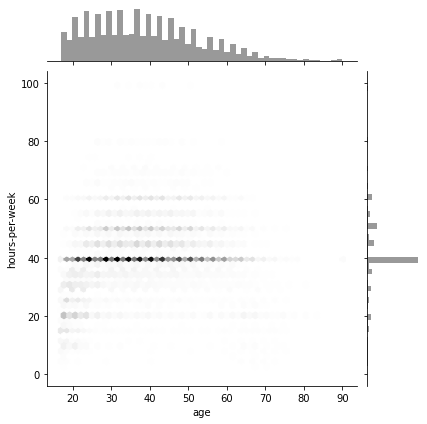

In [249]:
# Hexbin Plot - Age vs Hours-per-Week

sns.jointplot(x='age', y='hours-per-week',kind= 'hex', data=df, color='k')
plt.show()

#### Observation

- There is high density in between 40 - 60 hours per week where the age density is between 20 to 65 year of age.

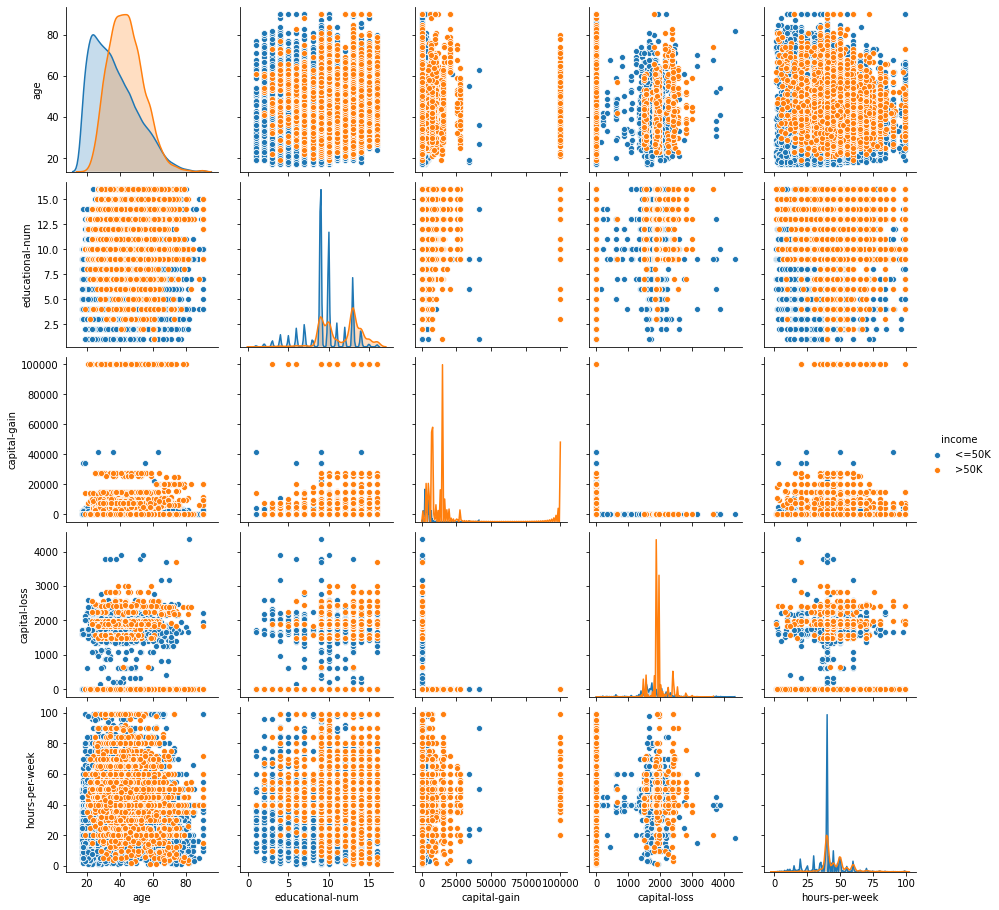

In [250]:
# Pairplot

sns.pairplot(data=new_df , hue = 'income')

#### Observation

- Age is symmetric for >50K but positively skewed for <=50K.
- There is no clear relation between age and capital-loss/capital-gain.
- The Individual of Age between ~18 to ~70 works most of the hours per week get the more paid income i.e. greater than 50.
- We can also state that from Age attribute that most of the people earns greater than 50k.
- There is constant relation between capital-loss and capital-gain i.e if capital-loss varies capital-gain remains constant.
- Income group who earns <=50k have flexible working hours.
- Individual's having captial gain/profit or no profit earns grater than 50k, whereas Individual's having captial loss or no loss mostly earns lower than 50k.
- Most of the Individuals more educational numbers have more income or greater than 50k.
- Person whose working hours are between 40-80 and capital gain is 100000 has >50K of salary.

### ii) Relationships between numerical and categorical columns
We can derive relationship between numerical and categorical columns using swarmplot, boxplot, barplot, etc.

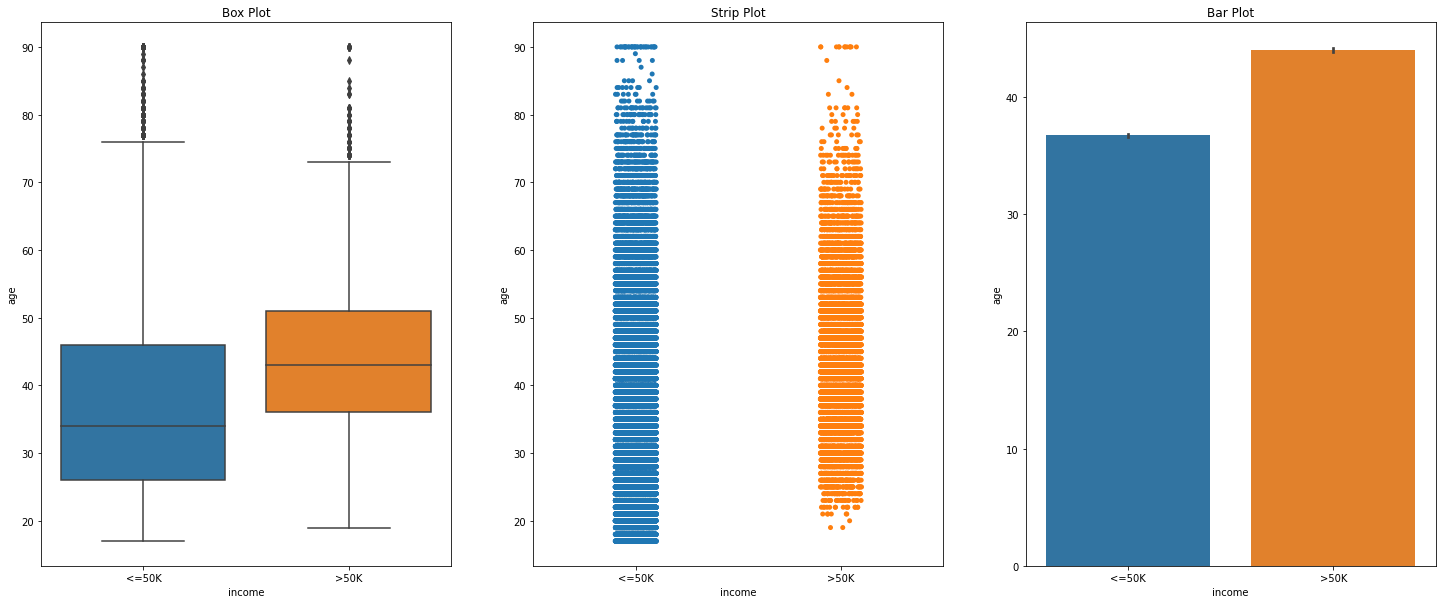

In [251]:
# Income vs Age

plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
plt.title("Box Plot")
sns.boxplot(data = new_df, x='income', y='age')

plt.subplot(1,3,2)
plt.title("Strip Plot")
sns.stripplot(data = new_df, x = 'income', y='age')

plt.subplot(1,3,3)
plt.title("Bar Plot")
sns.barplot(data = new_df, x='income', y='age')


#### Observation

- The income group(<=50k) has median of age 34 year which lower than the income group(>50k) which has median of age 43 year .
- Outliers present in both the income group w.r.t. "age" attribute.
- There are more people whose salary is above 50K.
- For income group(<=50k) Interquartile range (IQR) is between 25 & 46 . And on the other hand for income group(>50k) the IQR is between 38 & 50 .

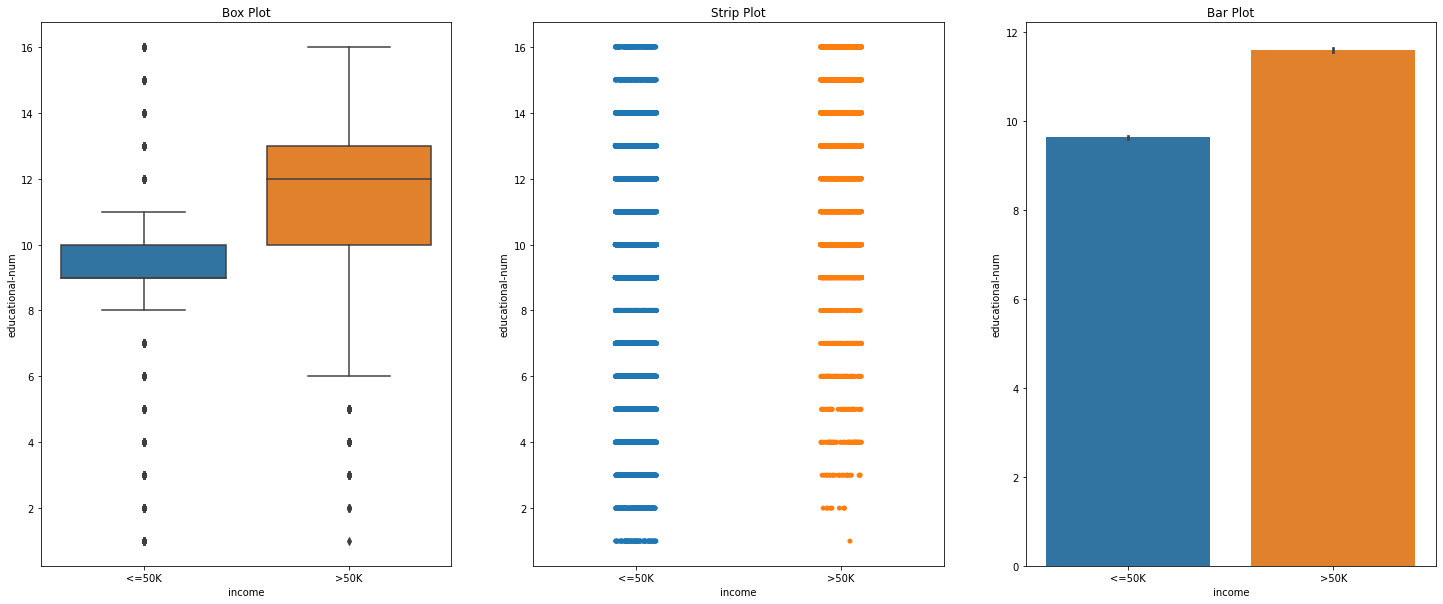

In [252]:
# Income vs educational-num

plt.figure(figsize = (25,10))
plt.subplot(1,3,1)
plt.title("Box Plot")
sns.boxplot(data = new_df, x='income', y='educational-num')

plt.subplot(1,3,2)
plt.title("Strip Plot")
sns.stripplot(data = new_df, x = 'income', y='educational-num')

plt.subplot(1,3,3)
plt.title("Bar Plot")
sns.barplot(data = new_df, x='income', y='educational-num')

#### Observation

- The income group(<=50k) has median of 9 year i.e. year of receiving education which lower than the income group(>50k) which has median of 12 year of receiving education.
- Outliers present in both the income group w.r.t. "educational-num" attribute.
- Outliers of income (<=50K) are more than the outliers than income (>50K).
- For income group(<=50k) IQR is between 9 & 10 and IQR for >50K is between 10 & 13.

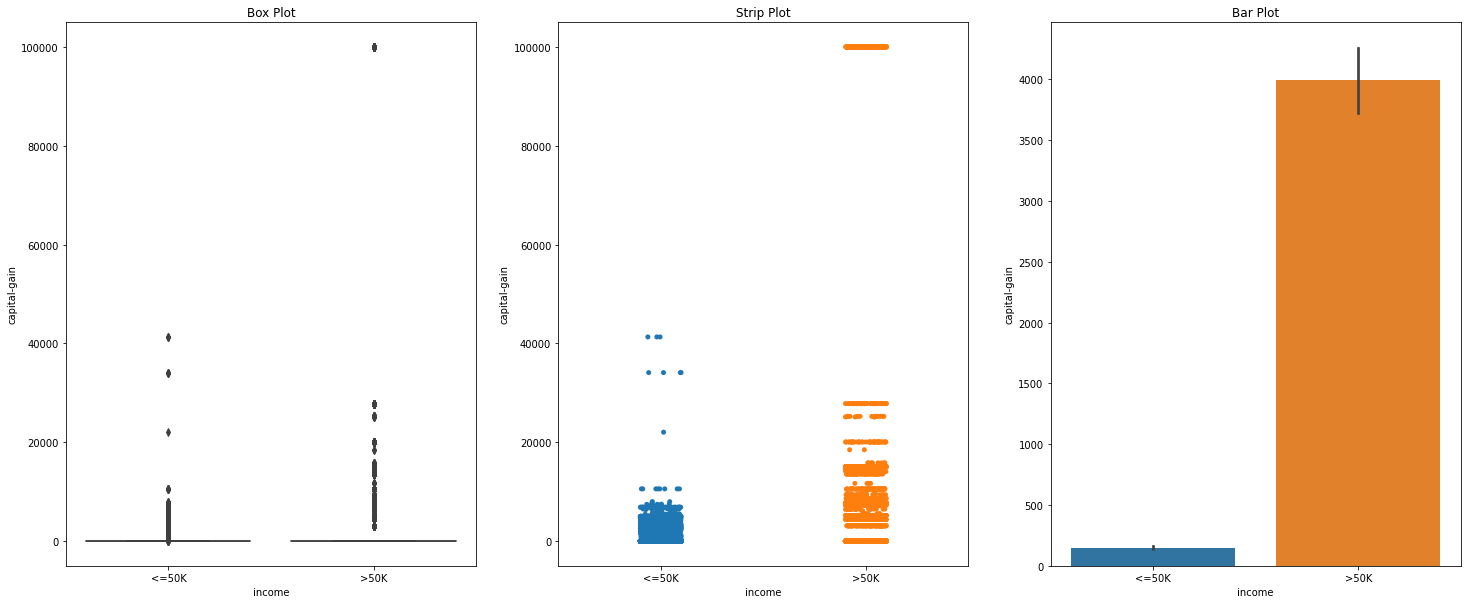

In [253]:
# Income vs capital-gain

plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title("Box Plot")
sns.boxplot(data = new_df, x='income', y='capital-gain')

plt.subplot(1,3,2)
plt.title("Strip Plot")
sns.stripplot(data = new_df, x = 'income', y='capital-gain')

plt.subplot(1,3,3)
plt.title("Bar Plot")
sns.barplot(data = new_df, x='income', y='capital-gain')

#### Observation

- Most of the capital gains value is accumulated at 0 for both the income group (<=50k and >50k) .
- There is more capital gain w.r.t income for >50K.
- Both income group have Outliers w.r.t. to 'captial-gain' attribute.

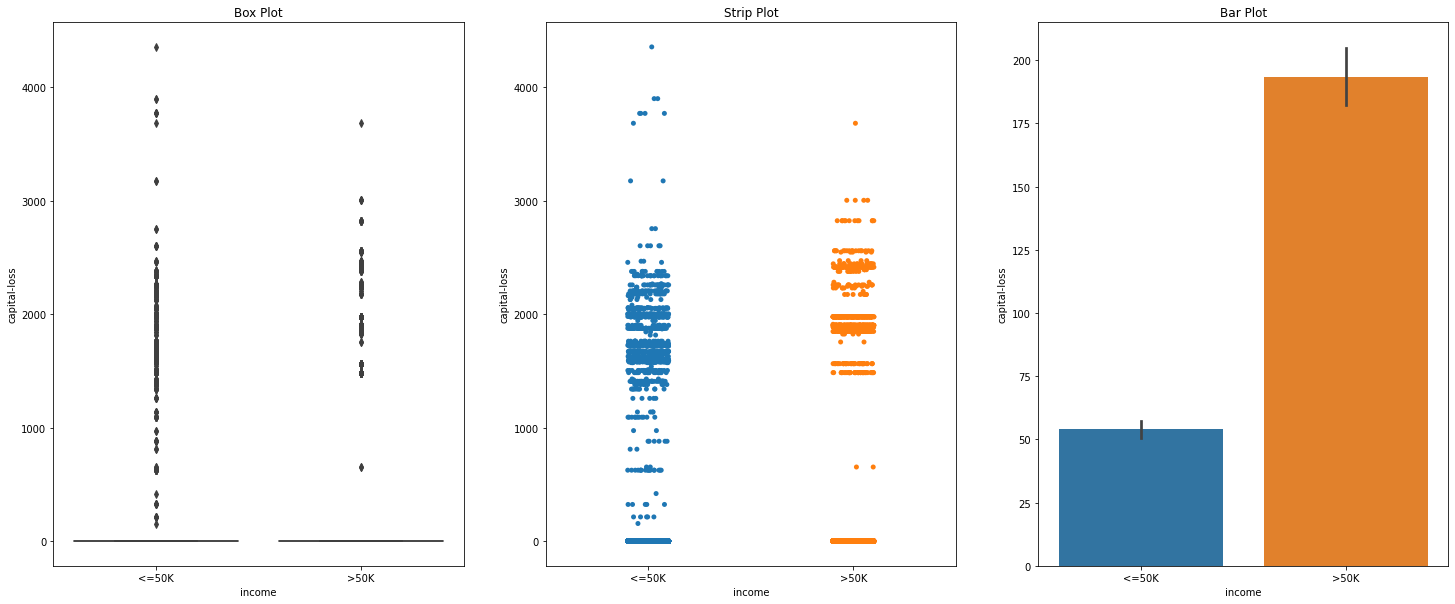

In [254]:
# Income vs capital-loss

plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title("Box Plot")
sns.boxplot(data = new_df, x='income', y='capital-loss')

plt.subplot(1,3,2)
plt.title("Strip Plot")
sns.stripplot(data = new_df, x = 'income', y='capital-loss')

plt.subplot(1,3,3)
plt.title("Bar Plot")
sns.barplot(data = new_df, x='income', y='capital-loss')

#### Observation

- Most of the capital-loss for both <=50K and >50K are concentrated at 0.
- The frequency distribution of income group (>50K) is greater than that of <=50K.
- Both income group have Outliers w.r.t. to 'captial-loss' attribute.

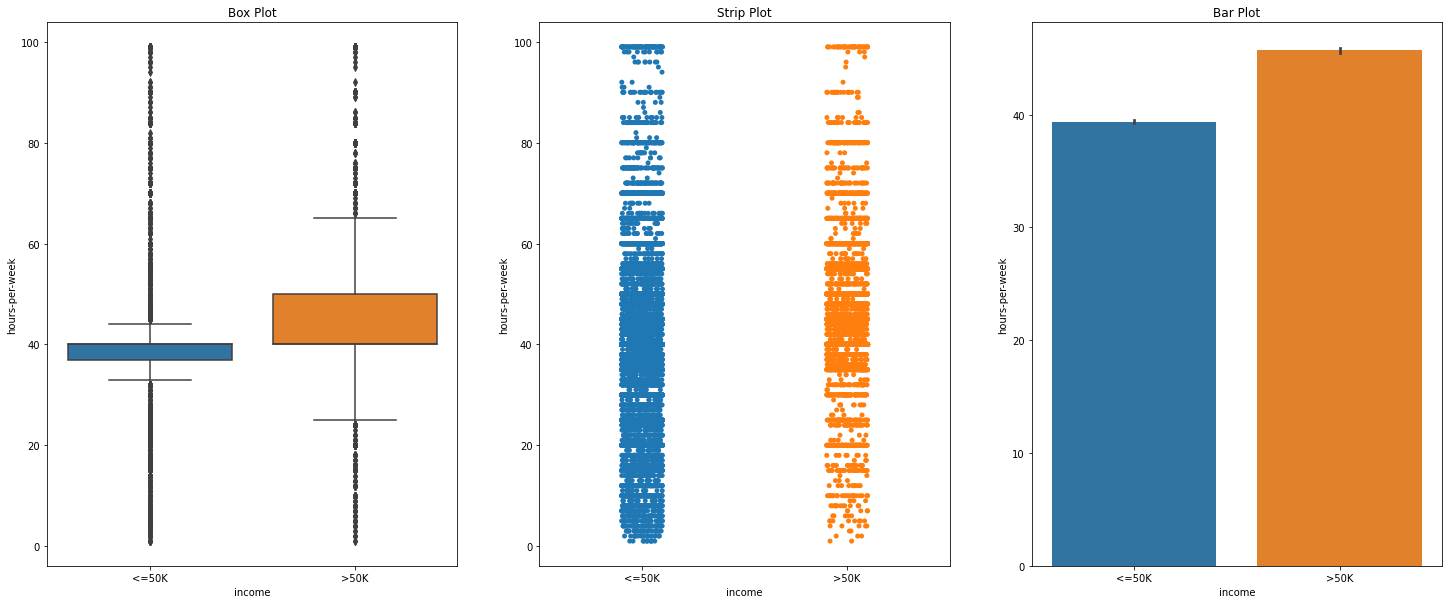

In [255]:
# Income vs hours-per-week

plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title("Box Plot")
sns.boxplot(data = new_df, x='income', y='hours-per-week')

plt.subplot(1,3,2)
plt.title("Strip Plot")
sns.stripplot(data = new_df, x = 'income', y='hours-per-week')

plt.subplot(1,3,3)
plt.title("Bar Plot")
sns.barplot(data = new_df, x='income', y='hours-per-week')

#### Observation

- The Median of "hours-per-week" for income group who earns >50k is greater than the income group who earns <=50k.
- Outliers present in both the income group w.r.t. "age" attribute. 
- There are more outliers present in the income group who earns <=50k.
- There are more number of person who earn >50K devote more hours per week in compare to the people who earn <=50K.
- For those income group who earns >50k has spend approx 45 hours per week than for those income group who earns <=50k has spend approx 38 hours per week.
- It means that hours per week has some contribution to the distinguish income groups.

### Degree of co-relation using heat-map

In [256]:
new_df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


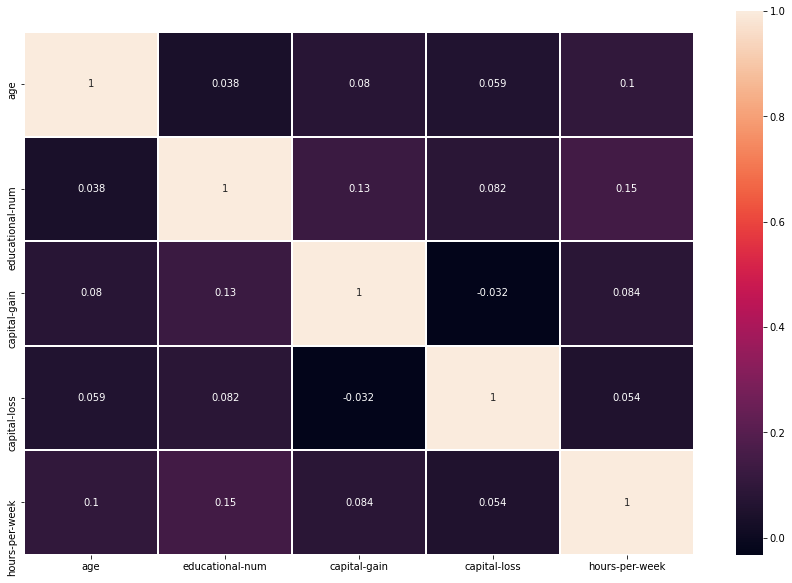

In [257]:
c=new_df.corr()
plt.figure(figsize=(15,10))
x = sns.heatmap(c,linewidths=1,annot=True)
bottom, top = x.get_ylim()
x.set_ylim(bottom + .0, top - .2)
plt.show()

#### Observation

- There is a no strong correlation neither positive nor negative between any numerical features.

### Conclusion

- There is no strong correlation among mumerical columns.
- Most of the workers can be seen working for 30 hours to 40 hours per week.
- Most of them works in private sector.
- Educational-num attribute is not affecting the target most.
- Capital-gain and Capital-loss can be zero.
- Captial Gain and Capital Loss attribute have most of the outliers.
- Most of the employee are male.
- Females who earns <=50k have more flexible working hours per week whereas males who earn >50K have more flexible working hours per week.
- Employeers who earns >50k have flexible working hours.
- Age group of 20-90 are working.
- Almost 90% of them are from United-States.
- Income is dependent on hours-per-week.
- Neither of the numerical column follows normal distribution except age which is positively skewed.
- Most of the individuals are well-educated completed their graduation, masters, etc.
- The ratio of married-spouse is greatest among all.


## Feature Transformation

Feature transformation refers to family of algorithms that create new features using the existing features. Scaling or normalizing features within a range, say between 0 to 1. 

In [258]:
new_df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### For Numerical Features  
- Use column normalisation (MinMaxScaler)

#### Steps :
1. Make a numpy array from the numerical columns of dataset.
2. Use MinMaxScaler on it to transform it.
3. Convert the numpy array to dataframe.

In [259]:
# Step 1.

features = new_df.iloc[:,[0,3,9,10,11]].values
features

array([[   25,     7,     0,     0,    40],
       [   38,     9,     0,     0,    50],
       [   28,    12,     0,     0,    40],
       ...,
       [   58,     9,     0,     0,    40],
       [   22,     9,     0,     0,    20],
       [   52,     9, 15024,     0,    40]])

In [260]:
# Step 2.

min_max_scaler = preprocessing.MinMaxScaler()
feature_scaler = min_max_scaler.fit_transform(features)
feature_scaler

array([[0.10958904, 0.4       , 0.        , 0.        , 0.39795918],
       [0.28767123, 0.53333333, 0.        , 0.        , 0.5       ],
       [0.15068493, 0.73333333, 0.        , 0.        , 0.39795918],
       ...,
       [0.56164384, 0.53333333, 0.        , 0.        , 0.39795918],
       [0.06849315, 0.53333333, 0.        , 0.        , 0.19387755],
       [0.47945205, 0.53333333, 0.1502415 , 0.        , 0.39795918]])

In [261]:
numerical = pd.DataFrame({'age': feature_scaler[:, 0], 'educational-num': feature_scaler[:, 1], 'capital-gain': feature_scaler[:,2],'capital-loss': feature_scaler[:,3],'hours-per-week': feature_scaler[:,4]})
numerical

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.400000,0.000000,0.0,0.397959
1,0.287671,0.533333,0.000000,0.0,0.500000
2,0.150685,0.733333,0.000000,0.0,0.397959
3,0.369863,0.600000,0.076881,0.0,0.397959
4,0.232877,0.333333,0.000000,0.0,0.295918
...,...,...,...,...,...
45217,0.136986,0.733333,0.000000,0.0,0.377551
45218,0.315068,0.533333,0.000000,0.0,0.397959
45219,0.561644,0.533333,0.000000,0.0,0.397959
45220,0.068493,0.533333,0.000000,0.0,0.193878


### For Categorical 
 - if more than 2 categories, use dummy variables.
 - Otherwise convert the feature to Binary.


#### Converting categorical data having more than two categories by using dummy variables.

##### Steps :
1. Create a new dataframe of categorical columns having more than two values.
2. Convert it into its dummy variables.

In [262]:
# Step 1.

dummy = new_df.iloc[:,[1,2,4,5,6,7,12]]
dummy

,workclass,education,marital-status,occupation,relationship,race,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States
5,Private,10th,Never-married,Other-service,Not-in-family,White,United-States
...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States


In [263]:
# Step 2.

categorical_more_than_2 = pd.get_dummies(dummy, columns=['workclass','education','marital-status','occupation','relationship','race','native-country'],drop_first=True)
categorical_more_than_2

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48839,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48840,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Converting categorical data having two categories by using multilabel binarizer.
##### Steps :
1. Create a new dataframe of categorical columns having two values.
2. Apply multilabel binarizer.
3. Convert it back to dataframe.

In [264]:
# Step 1.

multilabel_feature = new_df.iloc[:,[8,13]].values
multilabel_feature  

array([['Male', '<=50K'],
       ['Male', '<=50K'],
       ['Male', '>50K'],
       ...,
       ['Female', '<=50K'],
       ['Male', '<=50K'],
       ['Female', '>50K']], dtype=object)

In [265]:
# Step 2.
multilabelbinarizer = preprocessing.MultiLabelBinarizer()
multilabel_encoded_results= multilabelbinarizer.fit_transform(multilabel_feature)
# Classes created in MultiLabel data after Encoding
multilabel_encoded_results

array([[1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 0, 1],
       ...,
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 1, 0]])

In [266]:
# Step 3.

multilabelbinarizer.classes_
categorical_having_2 = pd.DataFrame(multilabel_encoded_results, columns=multilabelbinarizer.classes_)
# Viewing few rows of data
categorical_having_2 .head()

,<=50K,>50K,Female,Male
0,1,0,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


- After feature transformation, now our data is ready for machine learning algorithms.